In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()

# print the names of the 13 features
print("Features: ", digits.feature_names)

# print the label type of digits(class_0, class_1, class_2)
print("Labels: ", digits.target_names)
# print data(feature)shape
digits.data.shape

# Split 
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, random_state = 98
)

#decision tree clasifiar
digits_gini = DecisionTreeClassifier(criterion = "gini")

#model
digits_gini=digits_gini.fit(X_train,y_train)



Features:  ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
Labels:  [0 1 2 3 4 5 6 7 8 9]


In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# //predict the data test
prediction=digits_gini.predict(X_test)

print("Confusion Matrix: ",confusion_matrix(y_test, prediction))  
print ("Accuracy : ",accuracy_score(y_test,prediction)*100)

Confusion Matrix:  [[34  0  0  0  0  2  0  0  0  0]
 [ 0 21  0  2  0  0  1  0  2  0]
 [ 0  3 31  0  0  0  0  1  3  0]
 [ 0  0  0 34  0  0  0  1  1  1]
 [ 0  1  0  0 31  2  0  4  0  0]
 [ 0  0  0  2  0 32  1  0  0  1]
 [ 0  0  0  0  4  0 29  0  0  0]
 [ 0  0  0  0  3  4  0 34  0  2]
 [ 0  0  1  3  0  0  0  1 30  2]
 [ 1  1  0  4  1  1  0  1  1 26]]
Accuracy :  83.88888888888889


In [11]:
from sklearn import metrics

# //to print the report of classification of prdiction and test data
print(metrics.classification_report(y_test, prediction))


# //to genarate decision tree as graph
from sklearn.tree import export_graphviz


# converting number into string
target_names = digits.target_names.astype(str)

export_graphviz(digits_gini,out_file='B_tree.dot',feature_names=list(digits.feature_names),class_names=list(target_names), filled=True)

from subprocess import call
call(['dot', '-Tpng', 'B_tree.dot', '-o', 'B_tree.png', '-Gdpi=600'])

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        36
           1       0.81      0.81      0.81        26
           2       0.97      0.82      0.89        38
           3       0.76      0.92      0.83        37
           4       0.79      0.82      0.81        38
           5       0.78      0.89      0.83        36
           6       0.94      0.88      0.91        33
           7       0.81      0.79      0.80        43
           8       0.81      0.81      0.81        37
           9       0.81      0.72      0.76        36

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.84      0.84      0.84       360



0

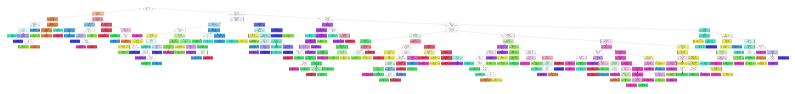

In [12]:
#print the tree
import matplotlib.pyplot as plt

plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('B_tree.png'))
plt.axis('off')
plt.show()